In [49]:
import graphviz
import pandas as pd
import numpy as np
import pydotplus 
from IPython.display import Image
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from sklearn import preprocessing 

0.8225806451612904
7
4


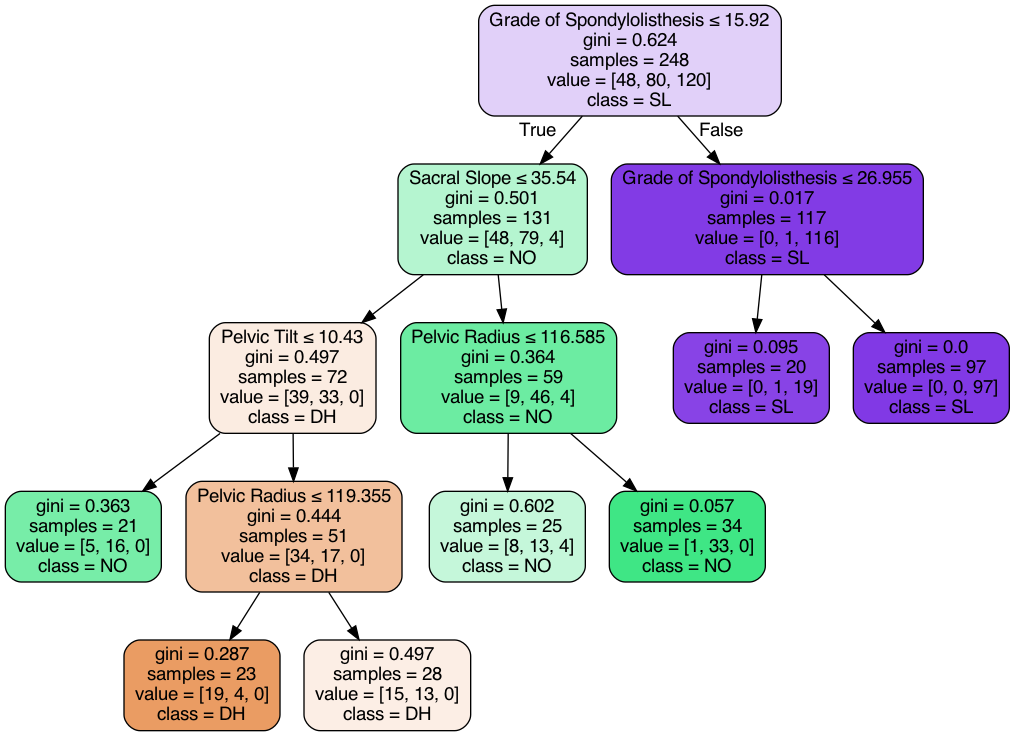

In [85]:
attributes = np.array(['Pelvic Incidence','Pelvic Tilt',
                     'Lumbar Lordosis Angle','Sacral Slope',
                     'Pelvic Radius','Grade of Spondylolisthesis', 'Class'])

dftrain = pd.read_csv("VCDS.csv", header=None, names=attributes)

features=attributes[:6]

target_features = dftrain.iloc[:,0:6]
target_class = dftrain.iloc[:,-1]
target_labels = ['DH','NO','SL']

x_train, x_test, y_train, y_test = train_test_split(target_features, 
                                                    target_class, test_size=0.2, 
                                                    random_state=14,
                                                    stratify=target_class)

clf = DecisionTreeClassifier(criterion="gini", splitter='best', max_depth=4, min_samples_leaf=20)
clf = clf.fit(x_train, y_train)


dot_data = tree.export_graphviz(clf, out_file=None,     
                                feature_names=features,        
                                class_names=target_labels,       
                                filled=True, rounded=True,                    
                                special_characters=True)  

y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred)) 

print(clf.get_n_leaves())
print(clf.get_depth())

graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

#All values are sample, different values have been used for different trees. 

0.8225806451612904
Class accuracy:
DH: 0.6666666666666666
NO: 0.7368421052631579
SL: 0.9354838709677419


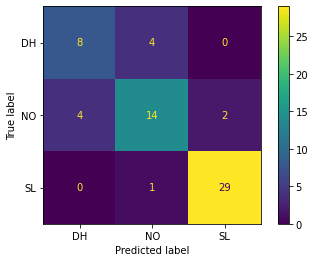

In [90]:
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred)) 
plot_confusion_matrix(clf, x_test, y_test, display_labels=target_labels)

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=0)[:, np.newaxis]

print("DH: {}\nNO: {}\nSL: {}".format(*cm.diagonal()))
plt.show()

In [87]:
print(len(clf.decision_path(x_test[y_pred != y_test ]).todense()))

clf.decision_path(x_test[y_pred != y_test]).todense()

11


matrix([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]])

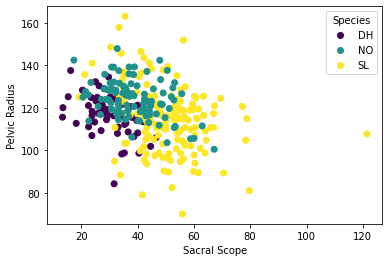

In [81]:
le   = preprocessing.LabelEncoder() 
label = le.fit_transform(target_class)
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(label.min(), label.max())

plt.scatter(dftrain.iloc[:,3], dftrain.iloc[:,4],c=label, cmap='viridis', norm=norm)

handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label=label)
           for i, label in enumerate(target_labels)]

plt.legend(handles=handles, title='Species')
plt.xlabel('Sacral Scope')
plt.ylabel('Pelvic Radius')
plt.show()

Text(0, 0.5, 'Accuracy')

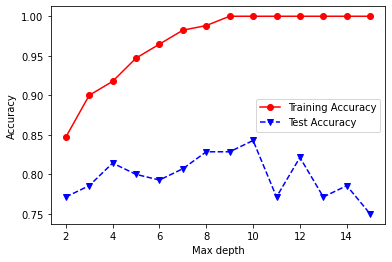

In [98]:

x_train, x_test, y_train, y_test = train_test_split(target_features, 
                                                    target_class, test_size=0.45, 
                                                    random_state=27,
                                                    stratify=target_class)

maxdepths = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(x_train, y_train)
    Y_predTrain = clf.predict(x_train)
    Y_predTest = clf.predict(x_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [464]:
max_accuracy=0.0
testSize=0.0
maxDepth=0
seed =0
for x in range(30,40):
    for y in range (4,5):
        for z in range (160,200):
            x_train, x_test, y_train, y_test = train_test_split(target_features, 
                                                                target_class, test_size=(x/100), 
                                                                random_state=z,
                                                                stratify=target_class)

            clf = DecisionTreeClassifier(max_depth=y)
            clf = clf.fit(x_train, y_train)

            y_pred = clf.predict(x_test)

            if (accuracy_score(y_test, y_pred)>max_accuracy):
                max_accuracy=accuracy_score(y_test, y_pred)
                testSize=(x/100)
                maxDepth=y
                seed=z
            
print(max_accuracy)
print(testSize)
print(maxDepth)
print(seed) 
#Sample values again

0.8782608695652174
0.37
4
189
